# Practical Statistics for Data Science

## Cap 1

### Estimacion de Ubicacion (Tendencia Central)

- La Media es el valor promedio. The mean is the sum of all values divided by the number of values

- La Media recortada (trimmed mean) eliminates the influence of extreme values. You calculate by dropping a fixed number of sorted values at each end and then taking an average of the remmainig value. 

- La Media ponderada (weighted mean) which you calculate by multiplying each data value by a user-specific weight and dividing their sum of the weights. Main motivations for using a weighted mean:

    - Some values are intrinsically more variable than others.
    - The data collected does not equally represent the difference groups that we are interested in measuring 

- La Mediana (median) is robust to outliers. Since the mean is much more sensitive to the data, there are many instances in which the median is a better metric for location 

- Outlier is any value that is very distant from the other values in a data set. Outlier should be identified and are usually worthy of further investigation

- The trimmed mean is widely used to avoid  the influence of outliers

#### Ejemplo: Estimaciones de ubicacion de poblacion y tasa de homicidios 

In [1]:
import pandas as pd
import numpy as np

In [2]:
state = pd.read_csv('./data/state.csv') 
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [3]:
#mean
state['Population'].mean()

6162876.3

In [4]:
#trimmed mean
from scipy.stats import trim_mean
trim_mean(state['Population'], 0.1)

4783697.125

In [5]:
#median
state['Population'].median()

4436369.5

The mean is bigger than the trimmed mean, which is bigger than the median. This is because the trimmed mean excludes the largest and five states (trim=0.1 drops 10% from each end)

Calculate the average murder rate for the country, we need to used a weighted mean or median to account for different populations in the states

In [6]:
#weighted mean
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [7]:
#weighted median
import wquantiles

wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

the weighted mean and the weighted median are about the same

### Estimate of Variability

#### Estimacion de Variabilidad de la Poblacion de cada Estado

Calculemos la Desviacion estandar, el rango intercuartil y la MAD para estimar la variabilidad de la poblacion de los estado

In [9]:
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [8]:
#Standar Deviation
state['Population'].std()

6848235.347401142

In [10]:
#IQR
state['Population'].quantile(0.75) - state['Population'].quantile(0.25) 

4847308.0

In [15]:
#MAD
from statsmodels import robust
robust.scale.mad(state['Population'])

3849876.1459979336

La Desviacion Estandar es casi el doble de la MAD lo que indica que la Desviacion es sensible a outliers.

3849876.1459979336

### Explorando la distribucion de los datos

muestra algunos percentiles de la tasa de homicidios por estado.

In [16]:
state['Murder.Rate'].quantile([0.05,0.25,0.50,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

La mediana es de 4 asesinatos por cada 100000 habitantes. El percentil 0.05 es de 1.6 y el percentil de 0.95 es de 6.51

Muestra el Diagrama de Caja de las poblaciones estatales

Text(0, 0.5, 'Population (millions)')

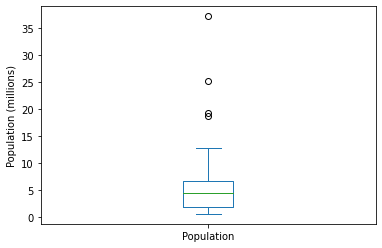

In [18]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

El grafico muestra que la poblacion estatal promedio es de aproximadamente 5 millones. La mitad de los estados se encuentran entre 2 y 7 millones. La parte superior e inferior de la caja son el 25 y 75 percentiles respectivamente. Las lineas discontinuas que salen de la caja muestra el rango para la mayor parte de los datos